In [28]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
X = np.load('data.npy')
Y = np.load('label.npy')

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [4]:
datagen = ImageDataGenerator(
        shear_range=0.15,
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [6]:
X_train.shape

(4684, 224, 224, 1)

In [7]:
# initialize the initial learning rate, number of epochs, batch size

INIT_LR = 0.0001
EPOCHS = 20
BS = 32

In [8]:
#Model Layers

model = Sequential()
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3 , activation = 'softmax'))

In [9]:
#Model Compiling

model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     2

In [11]:
#Decrease lr when model converges 

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=INIT_LR)

In [12]:
#Model Training 

H = model.fit(datagen.flow(X_train,Y_train, batch_size = BS) ,
                    epochs = EPOCHS , validation_data = datagen.flow(X_val, Y_val) ,
                    callbacks = [learning_rate_reduction])

Epoch 1/20
147/147 [==============================] - 560s 4s/step - loss: 1.0510 - accuracy: 0.5615 - val_loss: 2.4240 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 2/20
147/147 [==============================] - 556s 4s/step - loss: 0.7582 - accuracy: 0.6597 - val_loss: 2.2367 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 3/20
147/147 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.7035
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
147/147 [==============================] - 556s 4s/step - loss: 0.6768 - accuracy: 0.7035 - val_loss: 2.4411 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 4/20
147/147 [==============================] - 557s 4s/step - loss: 0.6255 - accuracy: 0.7312 - val_loss: 1.7639 - val_accuracy: 0.5009 - lr: 3.0000e-04
Epoch 5/20
147/147 [==============================] - 556s 4s/step - loss: 0.6035 - accuracy: 0.7523 - val_loss: 0.6154 - val_accuracy: 0.7551 - lr: 3.0000e-04
Epoch 6/20
147/147 [==============================]

In [13]:
#saving the model

model.save('Model_2.h5')

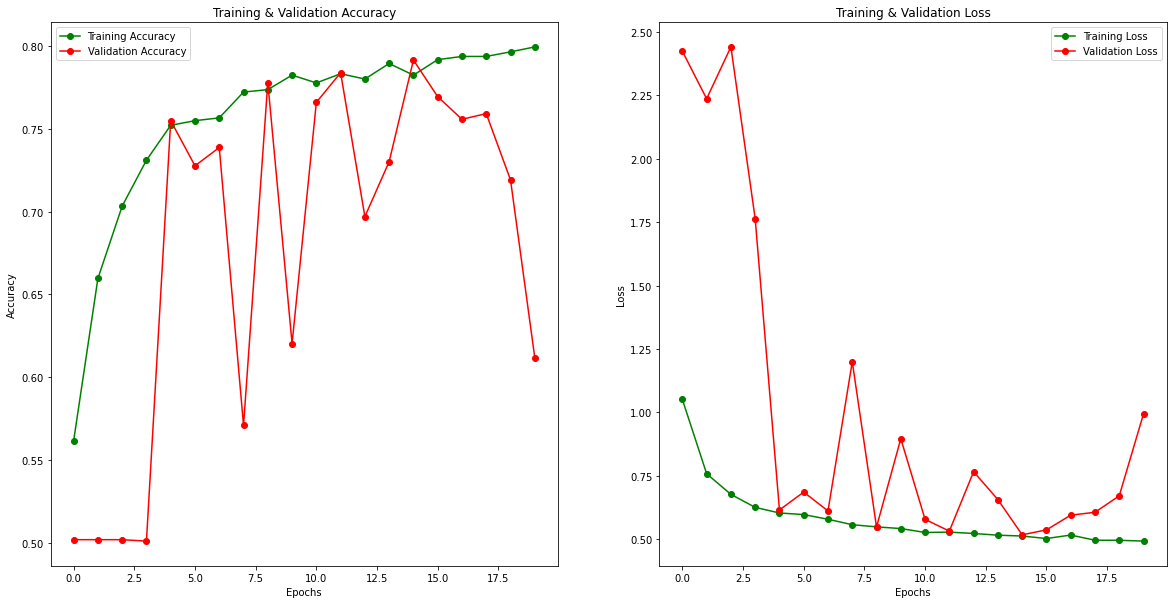

In [14]:
epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

train_acc = H.history['accuracy']
train_loss = H.history['loss']
val_acc = H.history['val_accuracy']
val_loss = H.history['val_loss']


ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [15]:
#loading testing data and labels

tfeature = np.load('tdata.npy')
tlabel = np.load('tlabel.npy')

In [44]:
new_model = tf.keras.models.load_model("Model_2.h5")

In [45]:
new_model.evaluate(tfeature,tlabel, verbose = 0)

[0.5647826790809631, 0.7653583884239197]

In [46]:
predictions = new_model.predict(tfeature)
predIdxs = np.argmax(predictions, axis=1)

In [47]:
print(classification_report(tlabel, predIdxs))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       322
           1       0.75      0.90      0.82       570
           2       0.57      0.44      0.50       280

    accuracy                           0.77      1172
   macro avg       0.76      0.72      0.73      1172
weighted avg       0.77      0.77      0.76      1172



Text(69.0, 0.5, 'Actual')

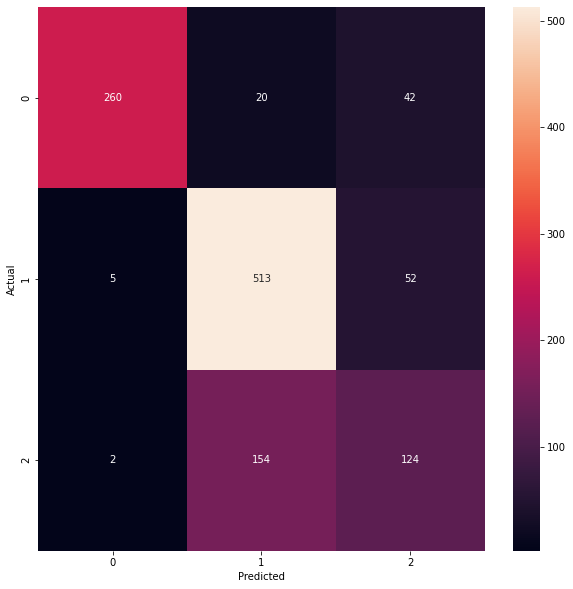

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(tf.math.confusion_matrix(tlabel, predIdxs), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')